<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%202/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

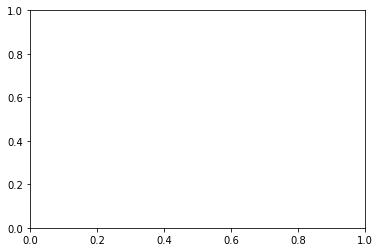

In [ ]:
# Import packages

import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

In [ ]:
def Gaussian(x, mu, sig):
  out = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sig)**2)
  return out

# Example run
print(Gaussian(1,0,0.5))

0.10798193302637613


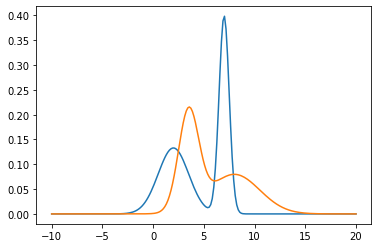

In [ ]:
x = np.linspace(-10,20,200)
p_state1 = Gaussian(x, 2, 1.5) + Gaussian(x, 7, 0.5)
p_state1 /= np.trapz(p_state1, x)
p_state2 = Gaussian(x, 8, 2.5) + Gaussian(x, 3.5, 1)
p_state2 /= np.trapz(p_state2, x)
plt.plot(x,p_state1)
plt.plot(x,p_state2)
plt.show()

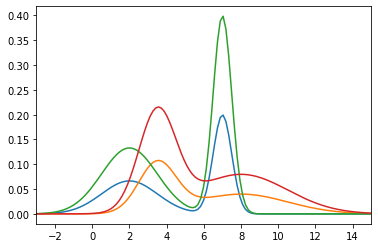

In [ ]:
prior_1 = 0.5
prior_2 = 0.5

#prior_1 = 0.9
#prior_2 = 0.1

posterior1 = (p_state1*prior_1)
posterior2 = (p_state2*prior_2)
plt.xlim(-3,15)

# posterior is not working?
plt.plot(x, posterior1)
plt.plot(x, posterior2)

# plot likelihoods
plt.plot(x, p_state1)
plt.plot(x, p_state2)
plt.show()

## Classification with Bayes

In [20]:
import numpy as np
np.random.seed(5)
from sklearn import datasets
ds = datasets.make_classification(1000,n_features=2,n_informative=2,n_redundant=0)
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(ds[0],ds[1], test_size=0.33)

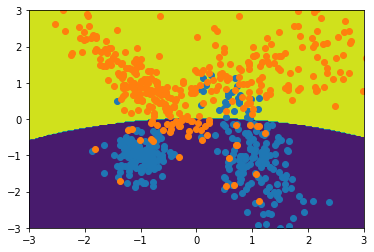

In [21]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


# function for generating the meshgrid for plots
def gen_sample_grid(npx = 200, npy = 200, limit =1):
  x1line = np.linspace(-limit,limit, npx)
  x2line = np.linspace(-limit,limit, npy)

  x1grid, x2grid = np.meshgrid(x1line, x2line)

  # produce an grid array with all grid values
  xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

  return xgrid, x1line, x2line


Xgrid, X1line, X2line = gen_sample_grid(npx=200, npy=200, limit = 3)

classVals = clf.predict(Xgrid)
classVals = np.reshape(classVals, [200,200])

plt.contourf(X1line, X2line, classVals)
# plot feature 1 vs feature 2, for class y=0
ax.scatter(x_train[y_train==0,0], x_train[y_train==0,1])

# plot feature 1 vs feature 2, for class y=1
ax.scatter(x_train[y_train==1,0], x_train[y_train==1,1])
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

In [22]:
y_test_model = clf.predict(x_test)
nTot = len(y_test) 
nMatch = 0 
for i in range(len(y_test)):
	if y_test[i] == y_test_model[i]:
		nMatch += 1

print(100 * nMatch / nTot)

91.21212121212122


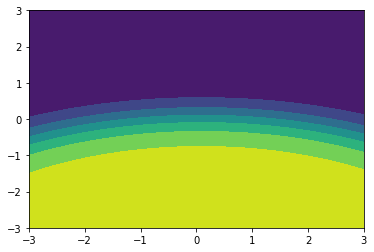

In [27]:
probVals = clf.predict_proba(Xgrid)
probGrid = np.reshape(probVals[:, 0], [200, 200])
plt.contourf(X1line, X2line, probGrid)
plt.show()